![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Classification, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using `Data/DATA_Customer-Churn.csv` file.

### Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Round 1
- ~~Import the required libraries and modules that you would need.~~
- ~~Read that data into Python and call the dataframe `churnData`.~~
- ~~Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.~~
- ~~Check for null values in the dataframe. Replace the null values.~~
- ~~Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:~~
  - ~~Split the data into a training set and a test set.~~
  - ~~Scale the features either by using normalizer or a standard scaler.~~
  - (optional)Fit a logistic Regression model on the training data.
  - ~~Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.~~



Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.



In [45]:
#Import the required libraries and modules that you would need.
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
file = 'DATA_Customer-Churn.csv'
churnData = pd.read_csv(file) 
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [4]:
#`TotalCharges` is object type. 
#Converting into numeric type using `pd.to_numeric` function.
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"],errors='coerce',downcast='float')

In [5]:
#Check for null values in the dataframe. Replace the null values.
nan_count = pd.isna(churnData).any()
nan_count.value_counts() #no null values?
churnData.dropna(inplace=True)

In [6]:
print(churnData.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float32
Churn                object
dtype: object


In [7]:
#Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges' ,'TotalCharges']]
y = churnData['Churn']
y = y.apply( lambda x : 1 if x=='Yes' else 0)
y = pd.Series(y,name='Churn')

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [10]:

model = KNeighborsClassifier(n_neighbors=11,weights='uniform') 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
y_pred_train=model.predict(X_train)
    

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.816889,0.779673
1,Precision,0.697536,0.608844
2,Recall,0.549164,0.478610


In [11]:
def best_neighbors(X_train, y_train):
    n_n = []
    metric = []
    metric2 = []
    for nn in range(2,200):
        model = KNeighborsClassifier(n_neighbors=nn,weights='uniform') 
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test) 
        y_pred_train=model.predict(X_train)
        n_n.append(nn)
        metric.append(round(recall_score(y_test, y_pred),5))
        metric2.append(round(recall_score(y_train, y_pred_train),5))
    metrics_df = pd.concat([pd.Series(n_n,name='NN'),pd.Series(metric,name='Recall_test'),pd.Series(metric2,name='Recall_train')], axis=1)
    return metrics_df

metrics_knn = best_neighbors(X_train, y_train)

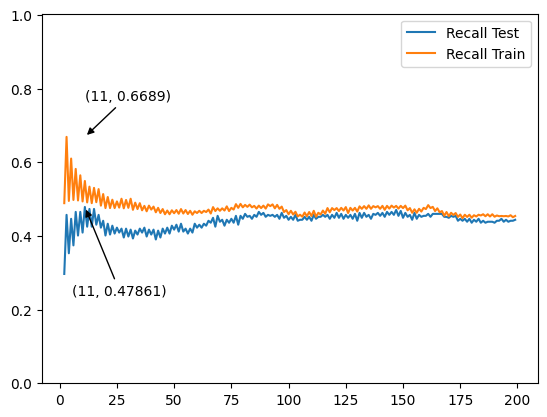

In [12]:

x=metrics_knn['NN'] 
y=list(metrics_knn['Recall_test'])
z=list(metrics_knn['Recall_train'])

def two_lines_plot(x,y,z): #plot to compare two feature over a third. *NOW WITH ARROWS!*
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    line, = ax.plot(x, y)
    line2, = ax.plot(x, z)
    line.set_label("Recall Test") # WTF is this hardcoded values?!
    line2.set_label("Recall Train") # make it work with Series.name! 
    ymax = max(y)
    zmax = max(z)
    xpos = y.index(ymax)
    xmax = x[xpos]
    
    ax.annotate((xmax,ymax), xy=(xmax, ymax), xytext=(xmax-(xmax*0.5), ymax-(ymax*0.5)), arrowprops=dict(facecolor='black', arrowstyle= '-|>'),) #arrow y
    ax.annotate((xmax,zmax), xy=(xmax, zmax), xytext=(xmax, zmax+0.1), arrowprops=dict(facecolor='black', arrowstyle= '-|>'),) #arrow z
    
    ax.set_ylim(0,max(ymax+(ymax*0.5),zmax+(zmax*0.5)))
    ax.legend()
    plt.show()
two_lines_plot(x,y,z)

# Decision Tree

- ~~Fit a Decision Tree Classifier on the training data.~~
- ~~Check~~ the accuracy on the test data. = 0.776830
- ~~Create a function that takes a list of integers as a parameter, iterates over the range as depths, and prints the performance log of the decision tree for each depth~~

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [14]:
def decisiontree(X_train, y_train, X_test, depth):
    model = DecisionTreeClassifier(max_depth=depth)
    
    model.fit(X_train, y_train)
    
    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)
    
    
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                             recall_score(y_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt),
                                            recall_score(y_test, y_pred_test_dt)]})
    
    return performance_df

schema={'Depth': 'float64', 'Train_accuracy': 'float64','Test_accuracy':'float64'}
metrics_depth = pd.DataFrame(columns=schema.keys()).astype(schema)
depth_levels = [2,3,5,10,25,50,75,100]
for depth in depth_levels:
    print("Depth:",depth)
    performance_df = decisiontree(X_train, y_train, X_test, depth)
    train_test_depth = pd.DataFrame({'Depth':depth,'Train_accuracy':performance_df['Train'][0],'Test_accuracy':performance_df['Test'][0]},index=[0])
    pd.concat([metrics_depth,train_test_depth])
    #display(performance_df)
metrics_depth.reset_index(inplace=True)

Depth: 2
Depth: 3
Depth: 5
Depth: 10
Depth: 25
Depth: 50
Depth: 75
Depth: 100


# Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


 Round 3
 -  ~~apply K-fold cross validation on your models before and check the model score.~~
**Note**: So far we have not balanced the data.

In [16]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, scoring="recall", cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.4755973154362416, 'Logistic Regression': 0.4642595078299777, 'KNN': 0.4903713646532438}


In [17]:
print("Comparing the 3 regression scores we find \n") # K-folds = 10 improved Classification tree model score

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.475597,0.46426,0.490371


# Balancing

In [19]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges' ,'TotalCharges']]
y = churnData['Churn']
y = y.apply( lambda x : 1 if x=='Yes' else 0)
y = pd.Series(y,name='Churn')

In [20]:
data = pd.concat([X,y],axis=1)
data.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.850000,0
1,34,0,56.95,1889.500000,0
2,2,0,53.85,108.150002,1
3,45,0,42.30,1840.750000,0
4,2,0,70.70,151.649994,1


In [21]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [22]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len,c1_len

(5163, 1869)

## Upsampling

In [23]:
category_1_up = category_1.sample(c0_len, replace=True) 
print(category_1_up.shape)

(5163, 5)


In [24]:
c0_len == len(category_1_up)

True

## Downsampling

In [25]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [26]:
c0_len = len(category_0)
c1_len = len(category_1)
c0_len,c1_len

(5163, 1869)

In [27]:
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [34]:
# reassemble the data
data = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
data = data.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
data['Churn'].value_counts()

Churn
1    1869
0    1869
Name: count, dtype: int64

## Upsampling using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [36]:
# refresh the data and do X,y split

y = data['Churn']
X = data.drop(['Churn'], axis=1)
y.value_counts()

Churn
1    1869
0    1869
Name: count, dtype: int64

In [37]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Churn
1    1869
0    1869
Name: count, dtype: int64

In [38]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority') # resample only the majority class
X_tl, y_tl = tl.fit_resample(X,y) # returns resampled data
y_tl.value_counts() # check the distribution of resampled labels

Churn
1    1869
0    1530
Name: count, dtype: int64

# Random forest

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [80],
    'min_samples_leaf' : [50],
    'max_features': ['sqrt'],
    ##'max_samples' : ['None', 0.5],
   'max_depth':[3,5]
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=42)

In [41]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [46]:
grid_search.fit(X_train,y_train.values.ravel())

/home/sr/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/sr/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/sr/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/sr/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'max_features': ['sqrt'],
                         'min_samples_leaf': [50], 'min_samples_split': [80],
                         'n_estimators': [50, 100]},
             return_train_score=True)

In [43]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 80,
 'n_estimators': 100}

In [48]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_train_score',ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.473808,0.013223,0.023849,0.000946,5,sqrt,50,80,100,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",...,0.795733,0.007818,1,0.804667,0.803333,0.804444,0.800889,0.798667,0.802400,0.002298
2,0.259478,0.008611,0.019794,0.008490,5,sqrt,50,80,50,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",...,0.795022,0.007147,2,0.802000,0.801333,0.802444,0.802000,0.799111,0.801378,0.001188
1,0.446596,0.031703,0.027368,0.008852,3,sqrt,50,80,100,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.787200,0.006945,4,0.798000,0.797556,0.790444,0.791778,0.788222,0.793200,0.003909
0,0.266939,0.055969,0.016768,0.005626,3,sqrt,50,80,50,"{'max_depth': 3, 'max_features': 'sqrt', 'min_...",...,0.788267,0.006469,3,0.796667,0.797111,0.790222,0.793778,0.787111,0.792978,0.003830
